In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = pd.read_csv('csd.csv')

In [ ]:
data.head()

In [ ]:
X = data["SMILES"]
Y = data["Solubility"]

In [ ]:
X = X.apply(lambda x: Chem.MolFromSmiles(x))
X = pd.DataFrame([[
        Descriptors.MolWt(mol),
        Descriptors.NumRotatableBonds(mol),
        Descriptors.TPSA(mol)
    ] for mol in X], columns=["MolWt", "NumRotatableBonds", "TPSA"])

In [ ]:
X[0:6]

In [ ]:
Y[0:6]

In [ ]:
smn = data.SMILES
smn

In [ ]:
# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Train the model
model = LinearRegression()
model.fit(X_train, Y_train)

In [ ]:

# Evaluate the model
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Mean squared error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


In [ ]:
#X_test
tdx= np.random.rand(1997, 3)

In [ ]:
tdx = tdx.reshape(-1)

In [ ]:
tdy = np.random.rand(1998,1)
tdy = tdx.reshape(-1)

In [ ]:
sns.scatterplot(data=train_test_split, x=tdx, y=tdx)
plt.title("Linear Regression Model for Solubility (Aq.)")
plt.xlabel("SMILES")
plt.ylabel("Aq. Solbility")
plt.show()

In [ ]:
sns.residplot(x=tdx, y=tdy, lowess=True, color="g")
plt.title("Residual Plot")
plt.xlabel("SMILES")
plt.ylabel("Aq. Solbility")
plt.show()

In [80]:
len(tdy)

5991

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U3'), dtype('float64')) -> None

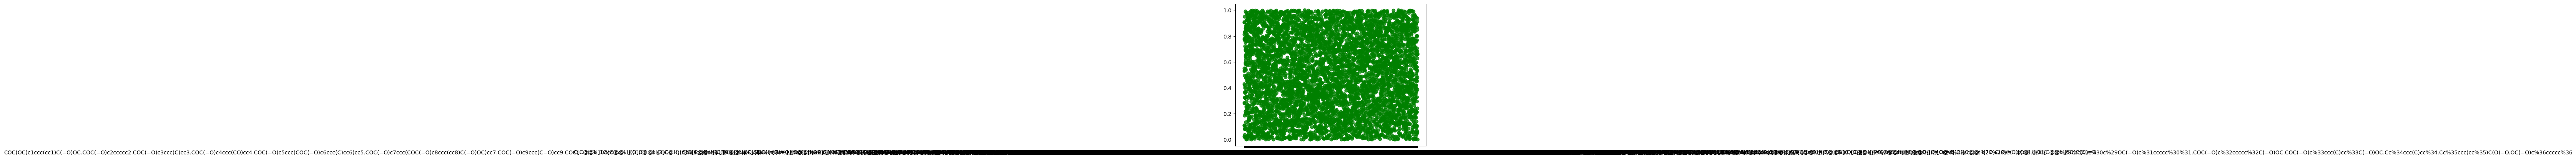

In [82]:
sns.regplot(x=smn[:5991], y=tdy, lowess=True, color="g")
plt.title("Smiles and Prediction Plot")
plt.xlabel("SMILES")
plt.ylabel("Predicted Aq. Solbility")
plt.show()